In [1]:
# 4.1
import numpy as np
import matplotlib.pyplot as plt

p = 3
x_train = np.array([-1, 0.3, 2])
X = np.vstack([np.ones(3), x_train]) # shape: (2, 3)
H = (1/p) * X @ X.T # shape: (2, 2)
y_T = np.array([-0.1, 0.5, 0.5]).reshape(1, 3) # shape: (1, 3)

# gradient for the quadratic error function
def gradient(w):
    return H @ w - (1/p) * X @ y_T.T # shape: (2, 1)
    
# initialization
w0 = -0.45
w1 = 0.2
w_init = np.array([[w0], [w1]]) # shape: (2, 1)
iter = 100
tol = 1e-16
steepest_descent_l_rate = 0.05

# gradient descent method
def steepest_descent(w, l_rate=steepest_descent_l_rate, iter=iter, tol=tol):
    w = w.copy()
    w0_vals = [w.flatten()[0]]
    w1_vals = [w.flatten()[1]]
    iterations = [0]

    i = 1
    while np.linalg.norm(gradient(w)) > tol and i < iter:
        w -= l_rate * gradient(w)
        w0_vals.append(w.flatten()[0])
        w1_vals.append(w.flatten()[1])
        iterations.append(i)
        i += 1

    return np.array(w0_vals), np.array(w1_vals), iterations

steepest_descent_w0, steepest_descent_w1, steepest_descent_iter = steepest_descent(w_init, steepest_descent_l_rate, iter, tol)

# line search method
def line_search(w, H=H, iter=iter, tol=tol):
    w = w.copy()
    w0_vals = [w.flatten()[0]]
    w1_vals = [w.flatten()[1]]
    iterations = [0]
    end_iter = []

    i = 1
    while i < iter:
        if np.linalg.norm(gradient(w)) > tol:
            l_rate = (gradient(w).T @ gradient(w)) / (gradient(w).T @ H @ gradient(w))
            w -= l_rate * gradient(w)
            w0_vals.append(w.flatten()[0])
            w1_vals.append(w.flatten()[1])
        else:
            end_iter.append(i)
            opt_l_rate = l_rate.copy()
            w -= opt_l_rate * gradient(w)
            w0_vals.append(w.flatten()[0])
            w1_vals.append(w.flatten()[1])
        iterations.append(i)
        i += 1
    print(f"Line search method converged at iteration {min(end_iter)}")
    
    return np.array(w0_vals), np.array(w1_vals), iterations

line_search_w0, line_search_w1, line_search_iter = line_search(w_init, H, iter, tol)

# conjugate gradient method
def conjugate_gradient(w, H=H, iter=iter, tol=tol):
    w = w.copy()
    # initialize gradient
    grad = gradient(w)
    d = -grad
    w0_vals = [w.flatten()[0]]
    w1_vals = [w.flatten()[1]]
    iterations = [0]
    end_iter = []
    
    i = 1
    while i < iter:
        if np.linalg.norm(grad) > tol:
            l_rate = -(d.T @ grad) / (d.T @ H @ d)
            w += l_rate * d
            w0_vals.append(w.flatten()[0])
            w1_vals.append(w.flatten()[1])
            
            new_grad = gradient(w)
            # momentum: Fletcher-Reeves form
            beta = -(new_grad.T @ new_grad) / (grad.T @ grad)
            d = new_grad + beta * d
            grad = new_grad
        else:
            end_iter.append(i)
            opt_l_rate = l_rate
            w += opt_l_rate * d
            w0_vals.append(w.flatten()[0])
            w1_vals.append(w.flatten()[1])

        iterations.append(i)
        i += 1
    print(f"Conjugate gradient method converged at iteration {min(end_iter)}")
    
    return np.array(w0_vals), np.array(w1_vals), iterations

conjugate_w0, conjugate_w1, conjugate_iter = conjugate_gradient(w_init, H, iter, tol)

Line search method converged at iteration 42
Conjugate gradient method converged at iteration 3


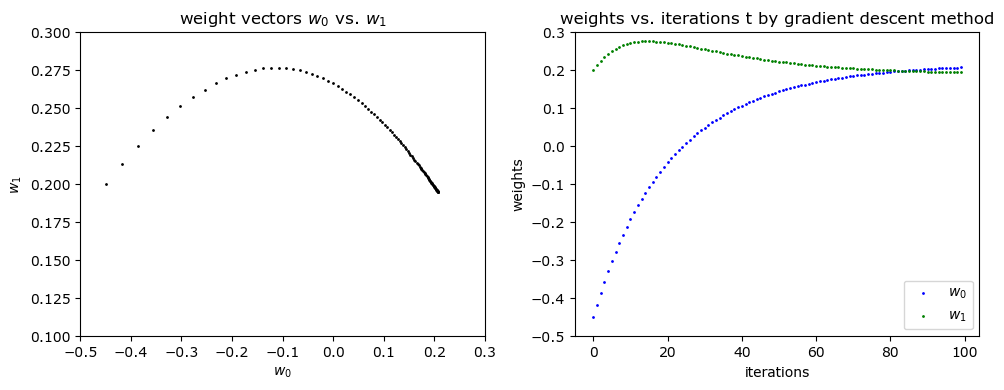

In [2]:
# scatter plot for gradient descent method
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(steepest_descent_w0, steepest_descent_w1, color='black', s=1)
ax[0].set_xlim([-0.5, 0.3])
ax[0].set_ylim([0.1, 0.3])
ax[0].set_xlabel('$w_0$')
ax[0].set_ylabel('$w_1$')
ax[0].set_title('weight vectors $w_0$ vs. $w_1$')

ax[1].scatter(steepest_descent_iter, steepest_descent_w0, color='blue', s=1, label='$w_0$')
ax[1].scatter(steepest_descent_iter, steepest_descent_w1, color='green', s=1, label='$w_1$')
ax[1].set_ylim([-0.5, 0.3])
ax[1].set_xlabel('iterations')
ax[1].set_ylabel('weights')
ax[1].set_title('weights vs. iterations t by gradient descent method')

plt.legend()
plt.tight_layout()
plt.show()

# slow convergence

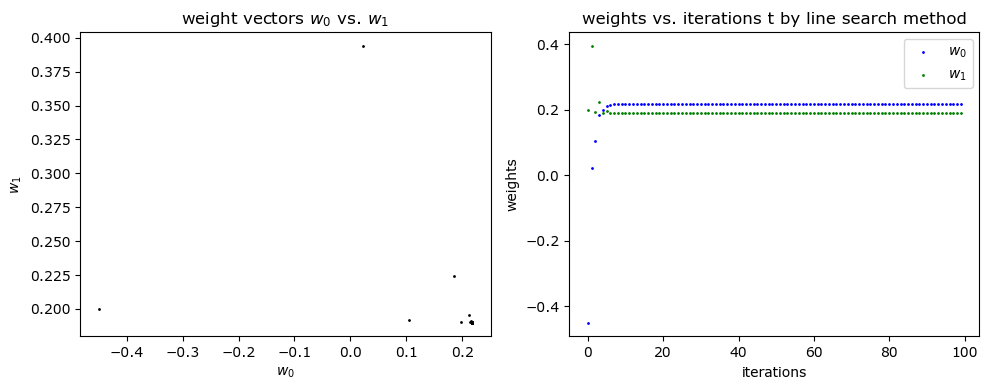

In [3]:
# scatter plot for line search method
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(line_search_w0, line_search_w1, color='black', s=1)
ax[0].set_xlabel('$w_0$')
ax[0].set_ylabel('$w_1$')
ax[0].set_title('weight vectors $w_0$ vs. $w_1$')

ax[1].scatter(line_search_iter, line_search_w0, color='blue', s=1, label='$w_0$')
ax[1].scatter(line_search_iter, line_search_w1, color='green', s=1, label='$w_1$')
ax[1].set_xlabel('iterations')
ax[1].set_ylabel('weights')
ax[1].set_title('weights vs. iterations t by line search method')

plt.legend()
plt.tight_layout()
plt.show()

# faster convergence than gradient descent method but slow at the minimum

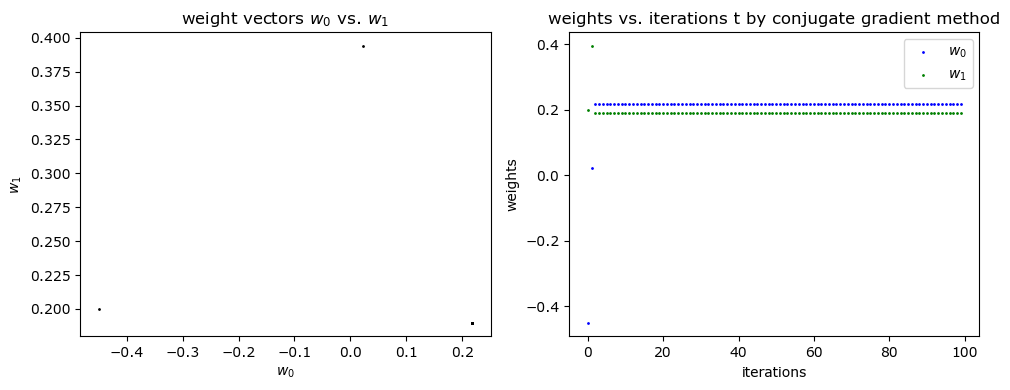

In [4]:
# scatter plot for conjugate gradient method
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(conjugate_w0, conjugate_w1, color='black', s=1)
#ax[0].set_xlim([0.205, 0.220]
#ax[0].set_ylim([0.185, 0.2])
ax[0].set_xlabel('$w_0$')
ax[0].set_ylabel('$w_1$')
ax[0].set_title('weight vectors $w_0$ vs. $w_1$')

ax[1].scatter(conjugate_iter, conjugate_w0, color='blue', s=1, label='$w_0$')
ax[1].scatter(conjugate_iter, conjugate_w1, color='green', s=1, label='$w_1$')
ax[1].set_xlabel('iterations')
ax[1].set_ylabel('weights')
ax[1].set_title('weights vs. iterations t by conjugate gradient method')

plt.legend()
plt.tight_layout()
plt.show()

# faster convergence than line search method